Total plays: 13900
Top track plays in history: 128
Estimated probability of hearing top track (p): 0.0092
Expected number of plays until hearing the top track: 108.59


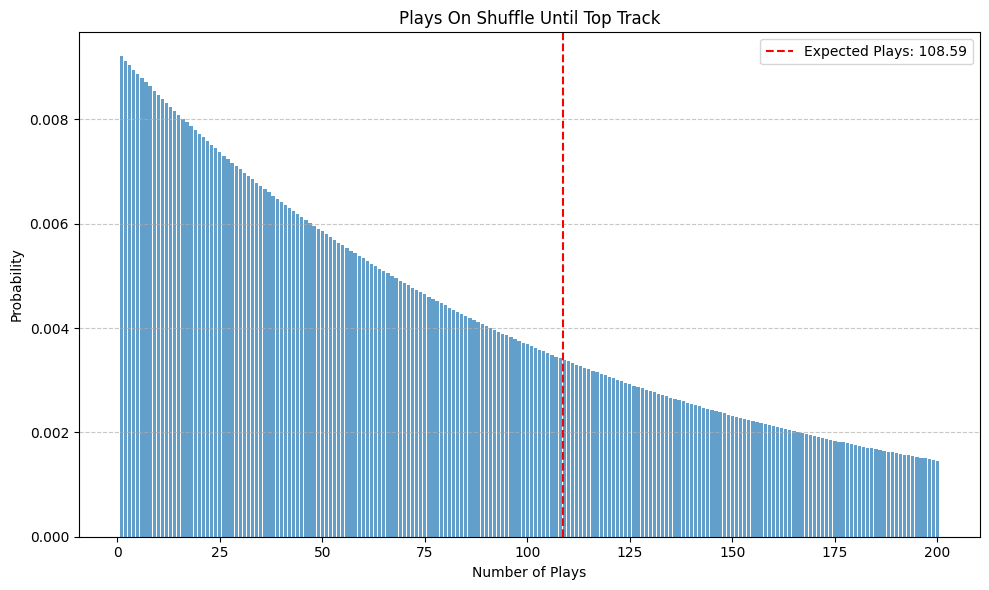

In [19]:
import json
from collections import Counter
from scipy.stats import nbinom
import matplotlib.pyplot as plt
import numpy as np

# Load your streaming history data (replace with your actual data loading)
with open('/Users/choudhry347/Desktop/SP_2025/Math-3320/Math-3320/spotify_streaming_data/Streaming_History_Audio_2024_4.json') as f:
    streaming_data = json.load(f)

# Load your wrapped data (replace with your actual data loading)
with open('/Users/choudhry347/Desktop/SP_2025/Math-3320/Math-3320/spotify_account_data/Wrapped2024.json') as f:
    wrapped_data = json.load(f)

with open("/Users/choudhry347/Desktop/SP_2025/Math-3320/Math-3320/spotify_account_data/YourLibrary.json") as f:
    your_library_data = json.load(f)


# Extract the top track URI from wrapped data
top_track_uri = wrapped_data['topTracks']['topTracks'][0]
top_track_play_count = wrapped_data['topTracks']['topTrackPlayCount']
distinct_tracks_played = wrapped_data['topTracks']['distinctTracksPlayed']

# Count occurrences of each track in streaming history
shuffle_track_uris = [
    entry['spotify_track_uri'] 
    for entry in streaming_data 
    if entry["shuffle"]
]

track_counts = Counter(shuffle_track_uris)
total_tracks_played = len(shuffle_track_uris)

# Estimate p = probability of hearing the top track in any given play
top_track_actual_plays = track_counts.get(top_track_uri, 0)
p = top_track_actual_plays / total_tracks_played

print(f"Total plays: {total_tracks_played}")
print(f"Top track plays in history: {top_track_actual_plays}")
print(f"Estimated probability of hearing top track (p): {p:.4f}")

# Negative Binomial Distribution: model number of failures before first success
# r=1 (waiting for the first success)
r = 1  
x = np.arange(0, 200)  # Number of failures before first success (0 means first play is the top track)
pmf = nbinom.pmf(x, r, p)

# Expected number of plays until hearing top track
expected_plays = r / p
print(f"Expected number of plays until hearing the top track: {expected_plays:.2f}")

# Visualization
plt.figure(figsize=(10,6))
plt.bar(x + 1, pmf, alpha=0.7)  # x+1 because we count plays, not failures
plt.axvline(expected_plays, color='red', linestyle='--', label=f'Expected Plays: {expected_plays:.2f}')
plt.title('Plays On Shuffle Until Top Track')
plt.xlabel('Number of Plays')
plt.ylabel('Probability')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Given that I have around 500 songs in my liked the fact that the estimated probability is less than 1/500 is surprsing 

P(A|B): 0.8372 (Skip given previous was skipped)
P(A|B^c): 0.4048 (Skip given previous was NOT skipped)


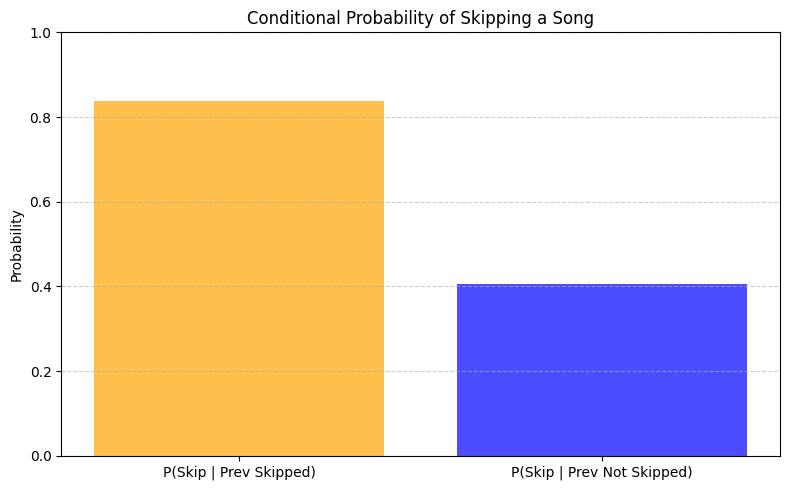

In [15]:
# Filter for plays with known skip status
skip_flags = [
    entry['skipped']
    for entry in streaming_data
    if entry['skipped'] is not None  # Ensure skip field exists
]

# Initialize counters
total_prev_skipped = 0  # Total times previous song was skipped
consecutive_skips = 0   # Total times both previous and current songs were skipped

total_prev_not_skipped = 0  # Total times previous song was not skipped
skips_after_not_skipped = 0 # Total times a song was skipped after previous song was not skipped

# Iterate through skip flags to count
for i in range(1, len(skip_flags)):
    prev_skipped = skip_flags[i - 1]
    curr_skipped = skip_flags[i]

    if prev_skipped:  # Previous song skipped
        total_prev_skipped += 1
        if curr_skipped:
            consecutive_skips += 1
    else:  # Previous song not skipped
        total_prev_not_skipped += 1
        if curr_skipped:
            skips_after_not_skipped += 1

# Calculate conditional probabilities
P_A_given_B = consecutive_skips / total_prev_skipped if total_prev_skipped > 0 else 0
P_A_given_Bc = skips_after_not_skipped / total_prev_not_skipped if total_prev_not_skipped > 0 else 0

print(f"P(A|B): {P_A_given_B:.4f} (Skip given previous was skipped)")
print(f"P(A|B^c): {P_A_given_Bc:.4f} (Skip given previous was NOT skipped)")

# Visualization
labels = ['P(Skip | Prev Skipped)', 'P(Skip | Prev Not Skipped)']
values = [P_A_given_B, P_A_given_Bc]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['orange', 'blue'], alpha=0.7)
plt.title('Conditional Probability of Skipping a Song')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


P(A|B) (skip | prev skipped): 0.8372
P(A^c|B) (not skip | prev skipped): 0.1628
P(A|B^c) (skip | prev not skipped): 0.4048
P(A^c|B^c) (not skip | prev not skipped): 0.5952
Overall P(Skip) (direct count): 0.7133
Overall P(Skip) (law of total probability): 0.7133


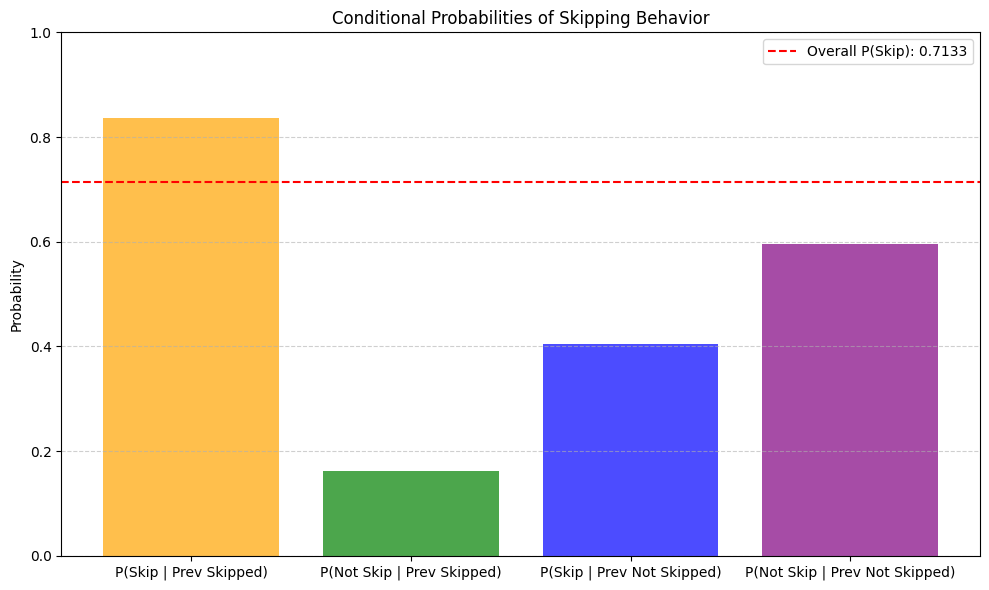

In [14]:
# Extract skip flags
skip_flags = [
    entry['skipped']
    for entry in streaming_data
    if entry['skipped'] is not None
]

# Initialize counters
total_prev_skipped = 0
consecutive_skips = 0
total_prev_not_skipped = 0
skips_after_not_skipped = 0

# Iterate to count events
for i in range(1, len(skip_flags)):
    prev_skipped = skip_flags[i - 1]
    curr_skipped = skip_flags[i]

    if prev_skipped:
        total_prev_skipped += 1
        if curr_skipped:
            consecutive_skips += 1
    else:
        total_prev_not_skipped += 1
        if curr_skipped:
            skips_after_not_skipped += 1

# Conditional probabilities
P_A_given_B = consecutive_skips / total_prev_skipped if total_prev_skipped > 0 else 0
P_Ac_given_B = 1 - P_A_given_B

P_A_given_Bc = skips_after_not_skipped / total_prev_not_skipped if total_prev_not_skipped > 0 else 0
P_Ac_given_Bc = 1 - P_A_given_Bc

# Overall probabilities
total_skips = sum(skip_flags)
total_songs = len(skip_flags)
P_skip_direct = total_skips / total_songs

# Law of total probability
P_B = total_prev_skipped / (total_prev_skipped + total_prev_not_skipped)
P_Bc = 1 - P_B
P_skip_total = P_A_given_B * P_B + P_A_given_Bc * P_Bc

# Print results
print(f"P(A|B) (skip | prev skipped): {P_A_given_B:.4f}")
print(f"P(A^c|B) (not skip | prev skipped): {P_Ac_given_B:.4f}")
print(f"P(A|B^c) (skip | prev not skipped): {P_A_given_Bc:.4f}")
print(f"P(A^c|B^c) (not skip | prev not skipped): {P_Ac_given_Bc:.4f}")
print(f"Overall P(Skip) (direct count): {P_skip_direct:.4f}")
print(f"Overall P(Skip) (law of total probability): {P_skip_total:.4f}")

# Visualization
labels = ['P(Skip | Prev Skipped)', 'P(Not Skip | Prev Skipped)', 
          'P(Skip | Prev Not Skipped)', 'P(Not Skip | Prev Not Skipped)']
values = [P_A_given_B, P_Ac_given_B, P_A_given_Bc, P_Ac_given_Bc]

plt.figure(figsize=(10,6))
plt.bar(labels, values, color=['orange', 'green', 'blue', 'purple'], alpha=0.7)
plt.axhline(P_skip_direct, color='red', linestyle='--', label=f'Overall P(Skip): {P_skip_direct:.4f}')
plt.title('Conditional Probabilities of Skipping Behavior')
plt.ylabel('Probability')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Total plays: 13900
Top track plays in history: 88
Estimated probability of hearing top track (p): 0.0063
Expected number of plays until hearing the top track: 157.95


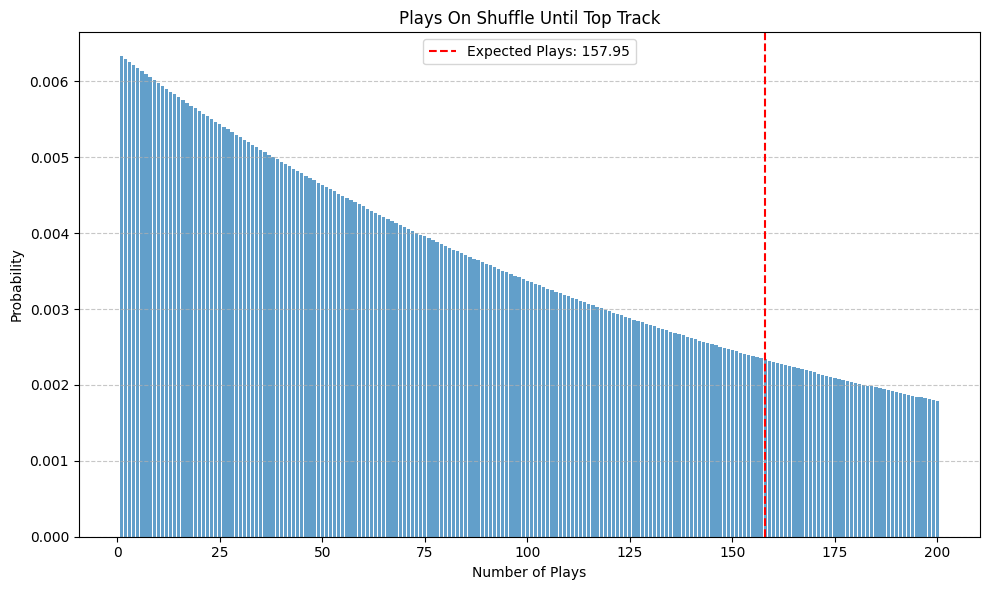

In [ ]:

# Count occurrences of each track in streaming history
shuffle_track_uris = [
    entry['master_metadata_album_artist_name'] 
    for entry in streaming_data 
    if entry["shuffle"]
]

track_counts = Counter(shuffle_track_uris)
total_tracks_played = len(shuffle_track_uris)

# Estimate p = probability of hearing the top track in any given play
top_track_actual_plays = track_counts.get("Drake", 0)
p = top_track_actual_plays / total_tracks_played

print(f"Total plays: {total_tracks_played}")
print(f"Top track plays in history: {top_track_actual_plays}")
print(f"Estimated probability of hearing top track (p): {p:.4f}")

# Negative Binomial Distribution: model number of failures before first success
# r=1 (waiting for the first success)
r = 1  
x = np.arange(0, 200)  # Number of failures before first success (0 means first play is the top track)
pmf = nbinom.pmf(x, r, p)

# Expected number of plays until hearing top track
expected_plays = r / p
print(f"Expected number of plays until hearing the top track: {expected_plays:.2f}")

# Visualization
plt.figure(figsize=(10,6))
plt.bar(x + 1, pmf, alpha=0.7)  # x+1 because we count plays, not failures
plt.axvline(expected_plays, color='red', linestyle='--', label=f'Expected Plays: {expected_plays:.2f}')
plt.title('Plays On Shuffle Until a Drake Song')
plt.xlabel('Number of Plays')
plt.ylabel('Probability')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Chi-square Statistic: 749.9776
P-value: 0.0000
Conclusion: Reject H₀ – Shuffle mode is biased!


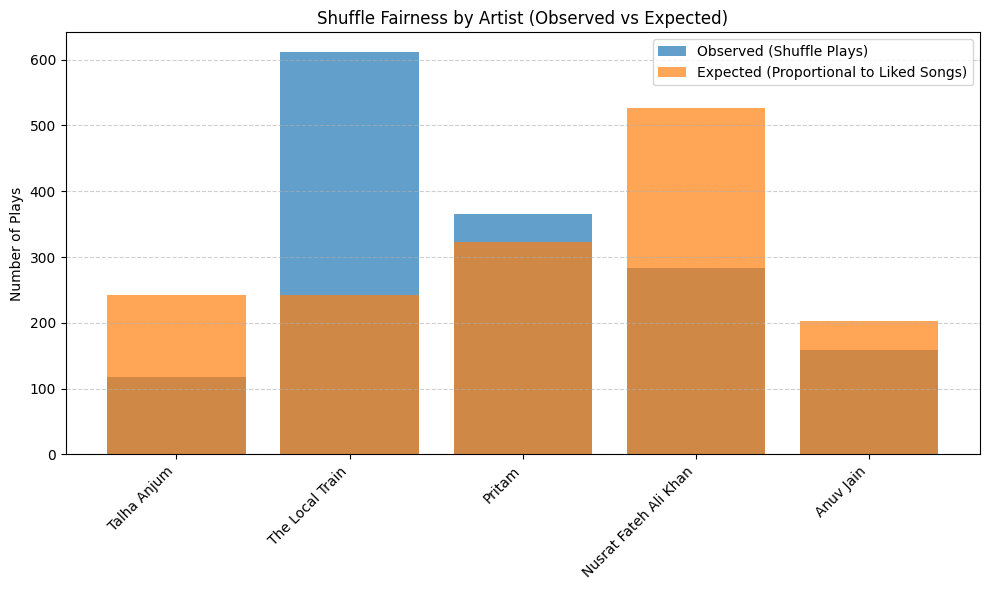

In [23]:
from scipy.stats import chisquare


top_artists = wrapped_data['topArtists']['topArtists']
top_artist_uris = set(["The Local Train", "Anuv Jain", "Pritam", "Nusrat Fateh Ali Khan", "Talha Anjum"])

# 2. Count number of liked songs per top artist
artist_song_counts = Counter()
for track in your_library_data['tracks']:  # Assuming your_library_data has this structure
    artist_uri = track.get('artist')
    if artist_uri in top_artist_uris:
        artist_song_counts[artist_uri] += 1

# 3. Extract shuffle plays from streaming data (observed plays)
observed_plays = Counter()
for play in streaming_data:
    if play.get('shuffle') and play.get('master_metadata_album_artist_name'):
        artist_uri = play.get('master_metadata_album_artist_name')  # Replace with actual field if different
        if artist_uri in top_artist_uris:
            observed_plays[artist_uri] += 1

# 4. Prepare data for Chi-square test
expected_freqs = []
observed_freqs = []

total_songs = sum(artist_song_counts.values())
total_observed = sum(observed_plays.values())

artist_labels = []

for artist_uri in top_artist_uris:
    expected_fraction = artist_song_counts[artist_uri] / total_songs
    expected_count = expected_fraction * total_observed
    observed_count = observed_plays.get(artist_uri, 0)

    expected_freqs.append(expected_count)
    observed_freqs.append(observed_count)

    artist_labels.append(artist_uri)  # Use artist names if available

# 5. Chi-square test
chi2_stat, p_value = chisquare(f_obs=observed_freqs, f_exp=expected_freqs)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Conclusion: Reject H₀ – Shuffle mode is biased!")
else:
    print("Conclusion: Fail to reject H₀ – Shuffle mode appears fair.")

# 6. Visualization
x = range(len(artist_labels))
plt.figure(figsize=(10,6))
plt.bar(x, observed_freqs, label='Observed (Shuffle Plays)', alpha=0.7)
plt.bar(x, expected_freqs, label='Expected (Proportional to Liked Songs)', alpha=0.7)
plt.xticks(x, artist_labels, rotation=45, ha='right')
plt.ylabel('Number of Plays')
plt.title('Shuffle Fairness by Artist (Observed vs Expected)')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()